In [1]:
import numpy as np
import pandas as pd
from RandomForest import RandomForest
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/dr/Documents/GitHub/VIX-Project/VIX_data.csv')

In [4]:
#Check for missing data
NAs = data.isnull().sum() + (data== '').sum()
missing_data = NAs.sum()>0
print(missing_data)

False


In [3]:
#Data Pre-Preocessing / Scaling with z = (X - mean)/std
from sklearn.preprocessing import StandardScaler

data_interim = data.drop('Date', axis=1) #Drop index column before scaling 

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_interim), columns=data_interim.columns)

df = pd.concat([data['Date'], df_scaled], axis=1)
df.set_index('Date', inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('VIX', axis=1)
y = df['VIX']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
clf = RandomForest()
clf.fit(X_train, y_train)

/Users/dr/Documents/GitHub/VIX-Project/RandomForest.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return X.iloc[idxs], y[idxs]


In [8]:
predictions = clf.predict(X_test)

In [9]:
def accuracy(y_test, y_pred):
    if isinstance(y_test, pd.Series):
        y_test = y_test.values

    if not isinstance(y_pred, np.ndarray):
        y_pred = np.array(y_pred)
    
    if y_test.shape != y_pred.shape:
        raise ValueError("y_test and y_pred must have the same shape")
    
    comparison = y_test == y_pred
    print('Comparison Array:', comparison)
    print('Sum of correct predictions:', np.sum(comparison))
    print('Total number of predictions:', len(y_test))
    
    acc = np.mean(comparison)
    return acc
    # return np.mean(y_test == y_pred)

In [10]:
acc = accuracy(y_test, predictions)

Comparison Array: [False False False False False False False False False False False False
 False False False False False False False False False]
Sum of correct predictions: 0
Total number of predictions: 21


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
y_pred = rf.predict(X_test)

In [19]:
acc = accuracy(y_test, y_pred)

Comparison Array: [False False False False False False False False False False False False
 False False False False False False False False False]
Sum of correct predictions: 0
Total number of predictions: 21


.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_mse_results = []
train_r2_results = []
test_mse_results = []
test_r2_results = []

for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)

    #Evaluate on training data
    train_pred = rf.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    train_mse_results.append(train_mse)
    train_r2_results.append(train_r2)

    #Evaluate on test data
    test_pred = rf.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mse_results.append(test_mse)
    test_r2_results.append(test_r2)

for i, estimator in enumerate(n_estimators):
    print(f'No. of estimators: {estimator}')
    print(f'Train MSE: {train_mse_results[i]:.4f}')
    print(f'Train R2: {train_r2_results[i]:.4f}')
    print(f'Test MSE: {test_mse_results[i]:.4f}')
    print(f'Test R2: {test_r2_results[i]:.4f}')
    print()


No. of estimators: 1
Train MSE: 0.2239
Train R2: 0.7843
Test MSE: 0.1669
Test R2: 0.7995

No. of estimators: 2
Train MSE: 0.2255
Train R2: 0.7827
Test MSE: 0.3697
Test R2: 0.5560

No. of estimators: 4
Train MSE: 0.0670
Train R2: 0.9354
Test MSE: 0.1510
Test R2: 0.8187

No. of estimators: 8
Train MSE: 0.0415
Train R2: 0.9600
Test MSE: 0.0898
Test R2: 0.8922

No. of estimators: 16
Train MSE: 0.0269
Train R2: 0.9741
Test MSE: 0.1288
Test R2: 0.8454

No. of estimators: 32
Train MSE: 0.0283
Train R2: 0.9727
Test MSE: 0.1147
Test R2: 0.8622

No. of estimators: 64
Train MSE: 0.0324
Train R2: 0.9688
Test MSE: 0.1273
Test R2: 0.8471

No. of estimators: 100
Train MSE: 0.0263
Train R2: 0.9746
Test MSE: 0.1156
Test R2: 0.8611

No. of estimators: 200
Train MSE: 0.0235
Train R2: 0.9773
Test MSE: 0.1424
Test R2: 0.8291



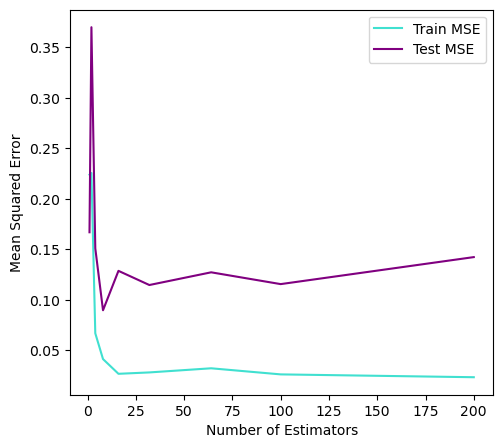

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, train_mse_results, color='turquoise', label='Train MSE')
plt.plot(n_estimators, test_mse_results, color='purple', label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')

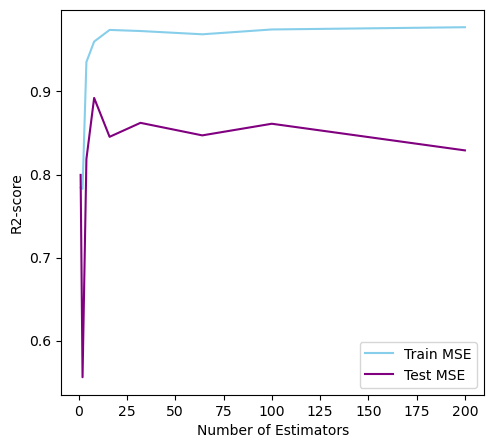

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, train_r2_results, color='skyblue', label='Train MSE')
plt.plot(n_estimators, test_r2_results, color='purple', label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('R2-score')
plt.legend(loc='best')